<a href="https://colab.research.google.com/github/MiklRov/Yandex_practicum/blob/main/mobil_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Выпускной проект. Выделение групп пользователей на основе поведения

### Описание проекта
Дерзкая и амбициозная команда сервиса «Ненужные вещи» жаждет увидеть в своём составе крутого аналитика, который возьмёт огромное количество наших данных и сотворит из них чудо. Конкретнее про чудо: наши пользователи совершают много действий в приложении, и мы уверены, что в этих данных есть инсайты, которые позволят нам стать лучшим приложением для продажи ненужных вещей. В рамках работы необходимо проанализировать поведение пользователей в мобильном приложениии "Ненужные вещи" и сегментировать их на разные группы для того, чтобы наладить более точный механизм взаимодействия с пользователями и повысить вовлеченность групп пользователей с низкими показателями.

### План исследования
 Загрузить данные и получить первичное представление о структуре и наполнении.

---
1. Предобработка
- Исследовать и обработать дубликаты;
- Исследовать и заменить пропущенные значения;
- В тех случаях, где необходимо, привести данные к соответствующим типам;
- Если необходимо, то изменить и привести названия столбцов к нижнему регистру;
- Выделить из столбца с датой необходимые временные промежутки.

---

2. Исследовательский анализ EDA  

-  Retantion Rate («коэффициент удержания»)  
-  Время, проведенное в приложении  
-  Частота действий  
-  Конверсия в целевое действие — просмотр контактов   
-  Вывод  
3. Сегментировать пользователей на основе событий   
-  По источнику, с которого пользователь установил приложение  
-  По пользователям, позвонившим по номеру телефона на карточке объявления  
-  По пользователям, которые пользовались поиском  
-  По пользователям, кликнувшим по рекомендованным объявлениям  
-  По пользователям, открывшим карточки объявления  
-  По пользователям, просмотревшим рекомендации  
-  По пользователям, открывшим карту размещенных объявлений  
-  Вывод  
4. Проверить статистические гипотезы
- Проверьте гипотезу различия конверсии в просмотры контактов между теми пользователями, которые совершили установку приложения, прийдя с источника yandex и пользователя, совершившими установки, из источника google.
-  Среднее время, проведенное в приложении, у групп пользователей ,совершивших целевое действие(просмотр контактов) и не совершивших его, различается
Шаг 5. Общие выводы и рекомендации
6. На основании проведенного исследования создать презентацию
 Ссылка на презентацию https://1drv.ms/b/s!AoLRG1AO867xy2VFn3RJcJej0iIt
7. Сделать дашборд в Табло

### Импорт библиотек, данных и получение первичной информации

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import math as mth
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import calendar
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

from datetime import datetime, timedelta
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy import stats as st
pd.set_option('display.max_colwidth', 150)
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use('dark_background')
sns.set_style("dark")
warnings.filterwarnings('ignore')


Данные предоставлены Яндекс.Практикумом

In [4]:
for df in [data, sources]:
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

In [5]:
for df in [data, sources]:
    display(df.isna().sum())

event.time    0
event.name    0
user.id       0
dtype: int64

userId    0
source    0
dtype: int64

In [6]:
for df in [data, sources]:
    display(df.duplicated().sum())

0

0

In [7]:
for df in [data, sources]:
    display(df.head())

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [8]:
for df in [data, sources]:
    display(df.describe())
    

,event.time,event.name,user.id
count,74197,74197,74197
unique,74197,16,4293
top,2019-10-07 00:00:00.431357,tips_show,cb36854f-570a-41f4-baa8-36680b396370
freq,1,40055,478


,userId,source
count,4293,4293
unique,4293,3
top,020292ab-89bc-4156-9acf-68bc2783f894,yandex
freq,1,1934


## Предобработка данных

Изменим названия столбцов data

In [9]:
data.columns = ['event_time', 'event_name', 'user_id']

In [10]:
data.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Изменим названия столбцов sources

In [11]:
sources.columns = ['user_id', 'source']

In [12]:
sources.head()

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


Приведем столбец event_time датасета data к формату даты и округлим данные до 1 секунды

In [13]:
data['event_time'] = pd.to_datetime(data['event_time'], format='%Y.%m.%d %H:%M:%S').dt.round('1S')

In [14]:
data.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Проверим количество пользователей в data

In [15]:
len(data['user_id'].unique())

4293

Проверим количество пользователей в sources

In [16]:
len(sources['user_id'].unique())

4293

In [17]:
set(sources['user_id']) == set(data['user_id'])

True

Количество пользователей в обоих датасетах совпадает, можно склеить их в один.

In [18]:
df = data.merge(sources, on='user_id', how = 'right')

In [19]:
df.sample(5)

,event_time,event_name,user_id,source
73323,2019-11-03 13:18:56,search_6,a3dd3738-52be-4fb5-8b02-36704f6b6cbe,google
7732,2019-10-08 14:32:23,tips_show,3bf5d145-80f5-48cf-ac3c-0c45111b9999,yandex
56929,2019-10-28 14:21:17,map,369f958d-9749-4bd3-aa74-41d7bdee46c4,google
16222,2019-10-11 09:58:08,search_6,e51888e5-fe1e-4ac3-b5bc-8656f37943d6,google
47610,2019-10-31 08:57:12,tips_show,5eaab80f-1bf9-4094-8b07-c4b04ae87cbc,other


Выделим из столбцов с датоами час, неделю, месяц, год и полную дату в отдельные столбцы

In [20]:
df['event_hour'] = df['event_time'].dt.hour
df['event_week'] = df['event_time'].astype('datetime64[W]')
df['event_month'] = df['event_time'].astype('datetime64[M]')
df['event_year'] = df['event_time'].astype('datetime64[Y]')
df['event_date'] = df['event_time'].astype('datetime64[D]')

In [21]:
df.sample(10)

,event_time,event_name,user_id,source,event_hour,event_week,event_month,event_year,event_date
31913,2019-10-26 09:11:13,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,9,2019-10-24,2019-10-01,2019-01-01,2019-10-26
57808,2019-10-25 21:56:02,tips_show,e907d8e4-1cd7-4579-bbad-cb0fe6a51a0c,yandex,21,2019-10-24,2019-10-01,2019-01-01,2019-10-25
27858,2019-10-24 22:19:46,search_1,22fbd020-1f72-483a-b452-ef13563a622e,other,22,2019-10-24,2019-10-01,2019-01-01,2019-10-24
42760,2019-11-03 20:44:10,contacts_show,cb32ff37-9d3e-4150-aff1-ca640731e342,yandex,20,2019-10-31,2019-11-01,2019-01-01,2019-11-03
58622,2019-10-26 12:45:23,contacts_show,fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5,google,12,2019-10-24,2019-10-01,2019-01-01,2019-10-26
52533,2019-10-30 08:24:24,tips_show,c4667906-ed8a-48a8-adfd-602b25d22244,other,8,2019-10-24,2019-10-01,2019-01-01,2019-10-30
35831,2019-10-28 13:28:04,tips_show,e4f99a9d-3c13-4972-ae47-690dad667749,other,13,2019-10-24,2019-10-01,2019-01-01,2019-10-28
47886,2019-10-21 22:31:25,tips_show,9c2e88e9-ee5a-4309-9943-4865ca0e7539,yandex,22,2019-10-17,2019-10-01,2019-01-01,2019-10-21
60231,2019-10-26 21:20:59,tips_show,3b6a7676-92b6-400d-b946-a221199c89a0,other,21,2019-10-24,2019-10-01,2019-01-01,2019-10-26
20183,2019-10-13 23:48:38,map,84557d6b-7887-4baf-9281-97c2e0f76e98,yandex,23,2019-10-10,2019-10-01,2019-01-01,2019-10-13


Посмотрим, что в столбцах event_name и source

In [22]:
df['source'].value_counts()

yandex    34286
google    20445
other     19466
Name: source, dtype: int64

In [23]:
df['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

Так как события contacts_show и show_contacts обозначают одно и то же событие - пользователь нажал на кнопку "Показать номер телефона", то можно склеить их в одно. Аналогично можно поступить с событиями search, т.к в нашем исследовании неважно, что именно ищут пользователи.

In [24]:
def events_type(i):
    if i == 'show_contacts':
        new_name = 'contacts_show'
        return new_name
    elif 'search' in i:
        new_name = 'search'
        return new_name
    return i

df['event_name'] = df['event_name'].apply(events_type)

In [25]:
df['event_name'].value_counts()

tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

In [26]:
df.tail()

,event_time,event_name,user_id,source,event_hour,event_week,event_month,event_year,event_date
74192,2019-11-03 23:46:47,map,d157bffc-264d-4464-8220-1cc0c42f43a9,google,23,2019-10-31,2019-11-01,2019-01-01,2019-11-03
74193,2019-11-03 23:46:59,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,23,2019-10-31,2019-11-01,2019-01-01,2019-11-03
74194,2019-11-03 23:47:01,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google,23,2019-10-31,2019-11-01,2019-01-01,2019-11-03
74195,2019-11-03 23:47:47,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,23,2019-10-31,2019-11-01,2019-01-01,2019-11-03
74196,2019-11-03 23:47:50,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google,23,2019-10-31,2019-11-01,2019-01-01,2019-11-03


## 2. EDA

Посмотрим, за какой период у нас есть данные

In [27]:
display(f'В логе представлены события за период с {df["event_date"].min().date()} по {df["event_date"].max().date()}')
display(f'Выборка в днях составляет {df["event_time"].max()-df["event_time"].min()}')

'В логе представлены события за период с 2019-10-07 по 2019-11-03'

'Выборка в днях составляет 27 days 23:58:13'

Так как в выборке представленны данные за 28 дней будем строить понедельные когорты

### Исследуем выбросы

Посмотрим количество действий на пользователя, что бы устранить "гиперактивных"

In [28]:
user_events = df.pivot_table(index='user_id', aggfunc={'event_name':'count'})
user_events.columns = ['event_count']
display('Минимум событий на одного пользователя:', user_events['event_count'].min())
display('Максимум событий на одного пользователя:', user_events['event_count'].max())

'Минимум событий на одного пользователя:'

1

'Максимум событий на одного пользователя:'

478

In [29]:
user_events.describe()

,event_count
count,"4,293.00"
mean,17.28
std,29.13
min,1.00
25%,5.00
50%,9.00
75%,17.00
max,478.00


Посмотрим какое влияние оказывает tips_show - это автоматическое действие и ни как не зависит от действий пользователей

In [30]:
dff = df.query('event_name != "tips_show"')

In [31]:
dff['user_id'].nunique(), df['user_id'].nunique()

(3586, 4293)

In [32]:
user_events_clean = dff.pivot_table(index='user_id', aggfunc={'event_name':'count'})
user_events_clean.columns = ['event_count']
display('Минимум событий на одного пользователя:', user_events_clean['event_count'].min())
display('Максимум событий на одного пользователя:', user_events_clean['event_count'].max())

'Минимум событий на одного пользователя:'

1

'Максимум событий на одного пользователя:'

336

In [33]:
user_events_clean.describe()

,event_count
count,"3,586.00"
mean,9.52
std,16.32
min,1.00
25%,3.00
50%,5.00
75%,10.00
max,336.00


Если удалим будут большие потери. Оставим как есть

 ### Retention Rate

Разобьем пользователей по когортам

Посмотрим период выборки

Возьмём дату, когда пользователь впервые проявил активность в мобильном приложении.

In [34]:
first_date = df.groupby(['user_id'])['event_date'].min()
first_date.name = 'start_dt'
df = df.join(first_date,on='user_id')

In [35]:
df.sample(10)

,event_time,event_name,user_id,source,event_hour,event_week,event_month,event_year,event_date,start_dt
72128,2019-11-02 12:41:06,photos_show,f627700d-8e0a-4d8c-87f1-becd99223755,other,12,2019-10-31,2019-11-01,2019-01-01,2019-11-02,2019-11-02
53628,2019-10-24 08:59:34,advert_open,5c51bbeb-28c3-4261-92b5-5dcd601dc28d,other,8,2019-10-24,2019-10-01,2019-01-01,2019-10-24,2019-10-24
13357,2019-10-28 10:02:42,tips_show,21230dd9-2f7f-4b77-a436-43d4d10388e0,yandex,10,2019-10-24,2019-10-01,2019-01-01,2019-10-28,2019-10-10
63317,2019-10-28 11:53:17,tips_show,4744f938-4c82-4dbf-9740-d01e4c6fc2a3,google,11,2019-10-24,2019-10-01,2019-01-01,2019-10-28,2019-10-28
487,2019-10-07 09:16:42,tips_show,af9f4d75-530c-40f9-9aab-a5535b84845e,other,9,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07
65505,2019-10-30 19:41:56,search,11c88949-b9c8-42d9-926a-bd0a0f4e058d,yandex,19,2019-10-24,2019-10-01,2019-01-01,2019-10-30,2019-10-29
38557,2019-10-22 15:11:46,search,3521521c-99cb-4142-96cb-0b97cd5c60e6,yandex,15,2019-10-17,2019-10-01,2019-01-01,2019-10-22,2019-10-18
21738,2019-10-25 11:26:23,photos_show,c0097deb-203a-42c7-baba-7d54374fb97f,yandex,11,2019-10-24,2019-10-01,2019-01-01,2019-10-25,2019-10-12
50837,2019-10-23 00:50:01,advert_open,12057f5f-5347-41f4-9789-c756398b049e,yandex,0,2019-10-17,2019-10-01,2019-01-01,2019-10-23,2019-10-23
32353,2019-10-31 09:20:12,search,570e1e48-5bfb-4c99-84b6-a10d9a15bf05,other,9,2019-10-31,2019-10-01,2019-01-01,2019-10-31,2019-10-16


Найдем когорту

In [36]:
df['activ_week'] = pd.to_datetime(df['event_date'],
                                                unit='d') - pd.to_timedelta(df['event_date'].dt.dayofweek, unit='d')
df['start_week'] = pd.to_datetime(df['start_dt'],
                                                      unit='d') - pd.to_timedelta(df['start_dt'].dt.dayofweek, unit='d')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   event_time   74197 non-null  datetime64[ns]
 1   event_name   74197 non-null  object        
 2   user_id      74197 non-null  object        
 3   source       74197 non-null  object        
 4   event_hour   74197 non-null  int64         
 5   event_week   74197 non-null  datetime64[ns]
 6   event_month  74197 non-null  datetime64[ns]
 7   event_year   74197 non-null  datetime64[ns]
 8   event_date   74197 non-null  datetime64[ns]
 9   start_dt     74197 non-null  datetime64[ns]
 10  activ_week   74197 non-null  datetime64[ns]
 11  start_week   74197 non-null  datetime64[ns]
dtypes: datetime64[ns](8), int64(1), object(3)
memory usage: 7.4+ MB


Расcчитаем lifetime

In [38]:
df['cohort_lifetime'] = df['activ_week'] - df['start_week']
df['cohort_lifetime'] = df['cohort_lifetime'] / np.timedelta64(1,'W')
df['cohort_lifetime'] = df['cohort_lifetime'].astype(int)

Сгруппируем данные по когорте и lifetime.

In [39]:
cohorts = df.groupby(['start_week','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()

Найдём количество пользователей в когорте. Возьмём их число на нулевую неделю:

In [40]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['start_week','user_id']]

In [41]:
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='start_week')

Посчитаем Retention Rate. Разделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте

In [42]:
cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users']

In [43]:
cohorts['start_week'] = cohorts['start_week'].dt.date

In [44]:
retention_pivot = cohorts.pivot_table(index='start_week',columns='cohort_lifetime',values='retention',aggfunc='sum')

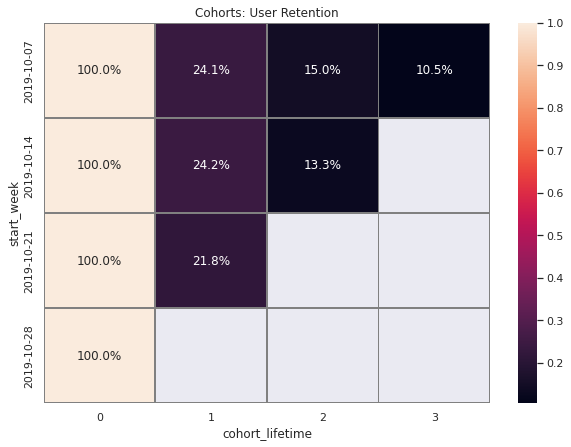

In [45]:
sns.set(style='dark')
plt.figure(figsize=(10, 7))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

#### Вывод:
Малый диапазон выборкиб возможно все описанное ниже погрешность  
Retention Rate в первую неделю убывает по когортам с течением времени.  
Для когорты 7 октября по 13 октября Retention Rate в первую неделю составляет 24,1%, то для пользователей, пришедших с 21 по 27 октября — уже 21,8%. Так, за 2 недели коэффициент удержания упал на 2,3%. Это говорит, что с каждой новой когортой поведение покупателей меняется. Так же чем больше когорта проводит времени в приложении, тем меньше пользователей осталось.


### Время, проведенное в приложении

Что определить эту метрику, нужно выделить для каждого пользователя сессии. Создадим столбец с отметкой времени предыдущего действия для каждого пользователя (pre_action_time):

In [46]:
df['pre_action_time'] = df.groupby('user_id')['event_time'].shift()
df.sample(10)

,event_time,event_name,user_id,source,event_hour,event_week,event_month,event_year,event_date,start_dt,activ_week,start_week,cohort_lifetime,pre_action_time
57217,2019-10-25 16:50:07,tips_show,bbf34803-113c-4c7c-96e8-e5204b327d7d,other,16,2019-10-24,2019-10-01,2019-01-01,2019-10-25,2019-10-25,2019-10-21,2019-10-21,0,2019-10-25 16:47:58
41043,2019-10-19 08:25:24,map,12ea9c12-e6ec-495e-b904-7510c65153ff,yandex,8,2019-10-17,2019-10-01,2019-01-01,2019-10-19,2019-10-19,2019-10-14,2019-10-14,0,2019-10-19 08:21:16
6395,2019-10-08 20:01:36,advert_open,9ce63488-758a-481a-bcb5-a02b467e1d84,yandex,20,2019-10-03,2019-10-01,2019-01-01,2019-10-08,2019-10-08,2019-10-07,2019-10-07,0,2019-10-08 20:01:06
68991,2019-10-31 04:50:38,photos_show,18273cd2-5539-4192-8e1a-70d04054bbeb,yandex,4,2019-10-31,2019-10-01,2019-01-01,2019-10-31,2019-10-31,2019-10-28,2019-10-28,0,NaT
65757,2019-10-31 10:36:25,tips_show,a5886b3e-6ed1-4c47-ac28-754ff8f429ce,yandex,10,2019-10-31,2019-10-01,2019-01-01,2019-10-31,2019-10-29,2019-10-28,2019-10-28,0,2019-10-31 10:35:29
22206,2019-10-13 07:51:30,tips_show,ba8f1329-cf63-4237-89a9-d3aeeb961693,google,7,2019-10-10,2019-10-01,2019-01-01,2019-10-13,2019-10-13,2019-10-07,2019-10-07,0,2019-10-13 07:51:25
44592,2019-10-20 19:47:59,contacts_show,b90a6958-6d40-47ec-9311-b94d7e217ce5,yandex,19,2019-10-17,2019-10-01,2019-01-01,2019-10-20,2019-10-20,2019-10-14,2019-10-14,0,2019-10-20 19:45:36
50398,2019-10-31 09:07:30,search,6a14b2fe-5aa5-496f-a5d0-71d7870ff91b,other,9,2019-10-31,2019-10-01,2019-01-01,2019-10-31,2019-10-22,2019-10-28,2019-10-21,1,2019-10-31 09:07:27
55600,2019-10-24 22:47:03,tips_show,b07b45d2-84d4-4cb1-abea-dcb6f64354d5,yandex,22,2019-10-24,2019-10-01,2019-01-01,2019-10-24,2019-10-24,2019-10-21,2019-10-21,0,2019-10-24 22:43:20
37077,2019-10-29 00:23:45,tips_show,a107daca-36e9-458e-93f2-ab615bdbb394,other,0,2019-10-24,2019-10-01,2019-01-01,2019-10-29,2019-10-17,2019-10-28,2019-10-14,2,2019-10-29 00:23:02


Создадим столбец active_session, в котором будет содержаться количество времени, проведенное в приложении между действиями:

In [47]:
df['active_session'] = df['event_time'] - df['pre_action_time']
df.sample(10)

,event_time,event_name,user_id,source,event_hour,event_week,event_month,event_year,event_date,start_dt,activ_week,start_week,cohort_lifetime,pre_action_time,active_session
49660,2019-10-25 19:22:56,tips_show,e387d029-59eb-41b9-9be5-5548389c079c,google,19,2019-10-24,2019-10-01,2019-01-01,2019-10-25,2019-10-22,2019-10-21,2019-10-21,0,2019-10-25 19:22:55,0 days 00:00:01
28709,2019-10-20 16:13:47,map,8ebe803e-8885-4e60-a43b-6ae98fe89e46,yandex,16,2019-10-17,2019-10-01,2019-01-01,2019-10-20,2019-10-15,2019-10-14,2019-10-14,0,2019-10-16 20:33:31,3 days 19:40:16
19726,2019-10-19 10:59:56,tips_show,7e797355-265c-4997-ba47-2258e06d3c66,other,10,2019-10-17,2019-10-01,2019-01-01,2019-10-19,2019-10-12,2019-10-14,2019-10-07,1,2019-10-18 10:41:27,1 days 00:18:29
62301,2019-10-31 11:26:09,contacts_call,9e78deca-71f0-4d56-b089-5f35ecad93c9,google,11,2019-10-31,2019-10-01,2019-01-01,2019-10-31,2019-10-27,2019-10-28,2019-10-21,1,2019-10-31 11:26:07,0 days 00:00:02
67179,2019-10-30 08:42:08,tips_show,9a8f5b68-87a6-4468-93e1-2130d5de0e63,other,8,2019-10-24,2019-10-01,2019-01-01,2019-10-30,2019-10-30,2019-10-28,2019-10-28,0,2019-10-30 08:36:57,0 days 00:05:11
54199,2019-10-25 01:07:39,contacts_show,c0a3930a-3216-40cd-b30a-7d1f1ca9e038,google,1,2019-10-24,2019-10-01,2019-01-01,2019-10-25,2019-10-24,2019-10-21,2019-10-21,0,2019-10-25 01:05:13,0 days 00:02:26
45289,2019-10-20 23:22:10,tips_show,ed9d638d-8d0b-434f-b78b-6e93a4da9e7f,yandex,23,2019-10-17,2019-10-01,2019-01-01,2019-10-20,2019-10-20,2019-10-14,2019-10-14,0,2019-10-20 23:15:57,0 days 00:06:13
50658,2019-10-22 21:31:18,photos_show,0a181616-3c8f-4b69-ad1f-d90785851081,yandex,21,2019-10-17,2019-10-01,2019-01-01,2019-10-22,2019-10-22,2019-10-21,2019-10-21,0,2019-10-22 21:29:58,0 days 00:01:20
2853,2019-10-17 12:06:47,tips_show,9b835c74-8ede-4586-9f59-e5473aa48de2,other,12,2019-10-17,2019-10-01,2019-01-01,2019-10-17,2019-10-07,2019-10-14,2019-10-07,1,2019-10-17 11:47:11,0 days 00:19:36
15514,2019-10-20 08:11:33,map,43b5c2b3-b1da-4ed4-88c0-404de977ef41,other,8,2019-10-17,2019-10-01,2019-01-01,2019-10-20,2019-10-10,2019-10-14,2019-10-07,1,2019-10-20 08:11:29,0 days 00:00:04


Пронумеруем сессии: сравним временной интервал между двумя действиями (active_session) с 30 минутами (именно это число мы возьмем за максимальную продолжительность единоразовой сессии). Если интервал будет превышать 30 минут, то сессии будет присваиваться следующий номер

In [48]:
f = lambda t: t.diff().gt(pd.Timedelta('30T')).cumsum()
df['session_num'] = df.groupby('user_id')['event_time'].apply(f) + 1

In [49]:
df.head(10)

,event_time,event_name,user_id,source,event_hour,event_week,event_month,event_year,event_date,start_dt,activ_week,start_week,cohort_lifetime,pre_action_time,active_session,session_num
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,NaT,NaT,1
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:00:00,0 days 00:00:01,1
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:00:01,0 days 00:00:06,1
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:00:07,0 days 00:01:21,1
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:01:28,0 days 00:00:07,1
5,2019-10-07 00:01:55,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:01:35,0 days 00:00:20,1
6,2019-10-07 00:02:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:01:55,0 days 00:00:06,1
7,2019-10-07 00:02:25,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:02:01,0 days 00:00:24,1
8,2019-10-07 00:02:31,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:02:25,0 days 00:00:06,1
9,2019-10-07 00:03:02,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:02:31,0 days 00:00:31,1


фильтруем столбец "active_session" следующим образом - если промежуток между действиями больше 30 минут - заменяем его на NaN

In [50]:
df['active_session'].loc[(df['active_session'] > pd.Timedelta(30,'m'))] = np.nan
df.head(10)

,event_time,event_name,user_id,source,event_hour,event_week,event_month,event_year,event_date,start_dt,activ_week,start_week,cohort_lifetime,pre_action_time,active_session,session_num
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,NaT,NaT,1
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:00:00,0 days 00:00:01,1
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:00:01,0 days 00:00:06,1
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:00:07,0 days 00:01:21,1
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:01:28,0 days 00:00:07,1
5,2019-10-07 00:01:55,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:01:35,0 days 00:00:20,1
6,2019-10-07 00:02:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:01:55,0 days 00:00:06,1
7,2019-10-07 00:02:25,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:02:01,0 days 00:00:24,1
8,2019-10-07 00:02:31,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:02:25,0 days 00:00:06,1
9,2019-10-07 00:03:02,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 00:02:31,0 days 00:00:31,1


NaNы заменим на 0,чтобы при суммировании не возникло проблем

In [51]:
df['active_session'].fillna('0',inplace=True)

Посмотрим на время в приложении

In [52]:
total_session = df.groupby(['user_id','session_num'], as_index=False)\
.agg({'active_session':'sum'})

In [53]:
total_session.head(10)

,user_id,session_num,active_session
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:09:56
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,0 days 00:08:27
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,0 days 00:14:59
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,0 days 00:12:38
4,00157779-810c-4498-9e05-a1e9e3cedf93,1,0 days 00:25:21
5,00157779-810c-4498-9e05-a1e9e3cedf93,2,0 days 01:16:12
6,00157779-810c-4498-9e05-a1e9e3cedf93,3,0 days 00:06:33
7,00157779-810c-4498-9e05-a1e9e3cedf93,4,0 days 00:52:01
8,00157779-810c-4498-9e05-a1e9e3cedf93,5,0 days 00:36:08
9,00157779-810c-4498-9e05-a1e9e3cedf93,6,0 days 00:00:00


In [54]:
total_session['active_session'].describe()

count                        10368
mean     0 days 00:12:52.668981481
std      0 days 00:19:51.607952024
min                0 days 00:00:00
25%                0 days 00:00:21
50%                0 days 00:05:35
75%         0 days 00:17:25.250000
max                0 days 05:21:58
Name: active_session, dtype: object

In [55]:
total_session['session_num'].median()

2.0

Ну и посмотрим количество сеансов, рассматривать сразу будем по медиане

In [56]:
total_session.groupby('user_id')['session_num'].count().mean()

2.4150943396226414

### Вывод
По нашим расчетам видим, что медиана и среднее количество сессий на пользователя примерно сходятся - в месяц пользователь проводит в приложении примерно *2 сессии* или * 30-40 минут*. Для специфики нашего приложения это нормальный результат - примерно за это время пользователь может найти то,что его интресует, рассмотреть варианты и принять решение о покупке. 

Возможно, в нашем случае следует работать не над увеличением времени, проведенном в приложении (скорее наоборот - чем быстрее пользователь будет находить то, что ему нужно, тем лучше; простотой использования мы можем увеличить вероятность того, что пользователь вернется к нам), а над количеством привлеченных пользователей.

###  Частота действий

In [57]:
full_events = df['event_name'].value_counts().to_frame()
full_events


,event_name
tips_show,40055
photos_show,10012
search,6784
advert_open,6164
contacts_show,4529
map,3881
favorites_add,1417
tips_click,814
contacts_call,541


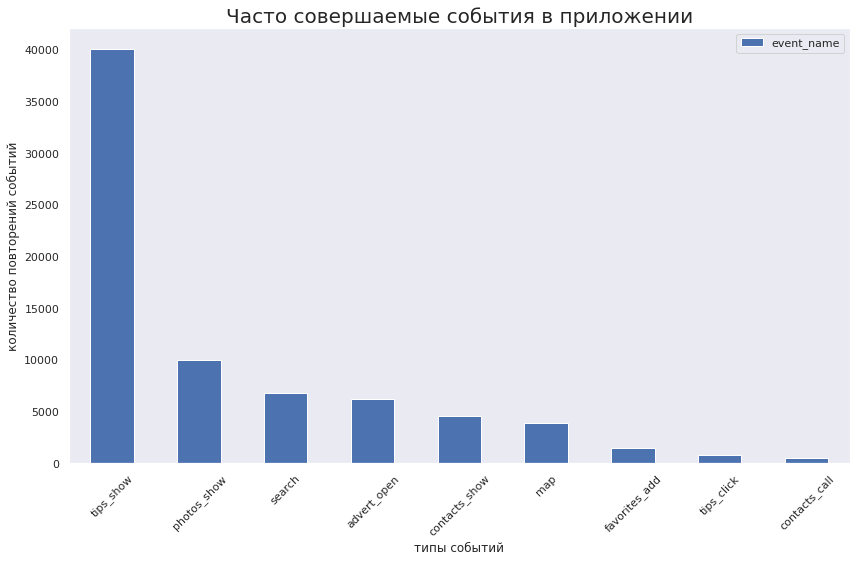

In [58]:
full_events.plot(kind='bar', figsize=(14,8))
plt.title('Часто совершаемые события в приложении', fontsize=20)
plt.gca().set(xlabel='типы событий', ylabel='количество повторений событий')
plt.xticks(rotation=45)
plt;

Количество пользователей совершавших каждое действие

In [59]:
def get_event_count(event_name):
    users_count = df[df['event_name'] == event_name]['user_id'].nunique()
    return users_count

In [60]:
events_count = full_events.reset_index()
events_count['no. of users'] = events_count['index'].apply(get_event_count)
events_count = events_count.sort_values(by='no. of users', ascending=False)
events_count = events_count.set_index('index')
events_count.index.name = None
events_count['percent_of_events'] = events_count['event_name'].apply(lambda x: round(x/full_events['event_name'].sum()*100, 2))
events_count['percent_of_unique_users'] = events_count['no. of users'].apply(lambda x: round(x/df['user_id'].nunique()*100, 2))
events_count

,event_name,no. of users,percent_of_events,percent_of_unique_users
tips_show,40055,2801,53.98,65.25
search,6784,1666,9.14,38.81
map,3881,1456,5.23,33.92
photos_show,10012,1095,13.49,25.51
contacts_show,4529,981,6.10,22.85
advert_open,6164,751,8.31,17.49
favorites_add,1417,351,1.91,8.18
tips_click,814,322,1.10,7.50
contacts_call,541,213,0.73,4.96


По диаграмме мы видим, что самым частоповторяющимся событием является *tips_show* (пользователь увидел рекомендованные объявления) - мы можем сделать предположение, что рекомендации для пользователя находятся на главной странице, и, открыв приложение, пользователь автоматически попадает на них.  

Далее с огромным отрывом идет *photos_show* (просмотр фотографий в объявлении), хотя, следуя логике, на втором месте должен был бы идти поиск. Однако, мы видим, что *search* совсем не популярное событие. Можем сделать вывод, что кнопка поиска расположена в нашем приложении не совсем очевидно для пользователей . Они гораздо охотнее просто просматривают фото.   

Затем с примерно одинаковыми показателями идут события advert_open (открытие карточки объявления), contacts_show (пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления), map (пользователь открыл карту размещенных объявлений). Здесь мы можем отметить, что гораздо чаще пользователи просматривают контакты, а не совершают звонки через приложение(у события contacts_call совсем небольшие показатели - очевидно, пользователи либо звонят "по-старинке", либо (как больше принято в последнее время) используют мессенджеры).

### Конверсия в целевое действие — просмотр контактов

Cгруппируем данные по пользователям и номеру сессии и просуммируем время, проведенное в приложении

In [61]:
features = df.groupby('user_id', as_index=False)\
.agg({'active_session':'sum', 'event_date':'count'})\
.rename(columns={'event_date':'visits'})

In [62]:
features.head()

,user_id,active_session,visits
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0 days 00:46:00,35
1,00157779-810c-4498-9e05-a1e9e3cedf93,0 days 03:16:15,71
2,00463033-5717-4bf1-91b4-09183923b9df,0 days 00:24:43,10
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,0 days 01:50:44,32
4,00551e79-152e-4441-9cf7-565d7eb04090,0 days 00:09:20,8


посчитаем, сколько раз пользователи совершили целевое действие - просмотр контактов

In [63]:
conversion = df.query('event_name=="contacts_show"')\
.groupby('user_id', as_index=False)\
.agg({'event_name':'count'})\
.rename(columns={'event_name':'conversions'})

In [64]:
conversion

,user_id,conversions
0,00157779-810c-4498-9e05-a1e9e3cedf93,11
1,00551e79-152e-4441-9cf7-565d7eb04090,3
2,005fbea5-2678-406f-88a6-fbe9787e2268,3
3,00753c79-ea81-4456-acd0-a47a23ca2fb9,1
4,007d031d-5018-4e02-b7ee-72a30609173f,2
...,...,...
976,fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5,17
977,ff1554b5-919e-40b1-90bb-ee1f7f6d5846,1
978,ffc01466-fdb1-4460-ae94-e800f52eb136,1
979,ffe68f10-e48e-470e-be9b-eeb93128ff1a,1


добавим столбец conversions в датасет с признаками

In [65]:
features = pd.merge(features, conversion, on='user_id', how='left')

заменим пропуски нулями

In [66]:
features['conversions'] = features['conversions'].fillna(0)

In [67]:
features.sample(10)

,user_id,active_session,visits,conversions
3651,d96a250b-ac54-403e-bb52-983bd8348102,0 days 00:01:40,6,0.00
3340,c83d8f7c-3b43-495c-94db-3aac32dbed98,0 days 00:24:25,13,0.00
21,01147bf8-cd48-49c0-a5af-3f6eb45f8262,0 days 01:09:08,30,0.00
2729,a2f36a4e-4aad-40b4-90cf-ebbbd082aa21,0 days 00:09:05,5,0.00
4,00551e79-152e-4441-9cf7-565d7eb04090,0 days 00:09:20,8,3.00
3246,c2a65ac2-331d-4fdc-9dc8-2a0f8a0a3a1a,0 days 00:09:47,9,2.00
2120,7ee78f44-7358-43e1-9167-16f2906e1a95,0 days 00:03:35,7,0.00
3144,bd3b51d0-02a3-4618-94cc-0af259d79e11,0 days 00:03:52,3,0.00
1817,6d3c4c44-7cd6-4d56-ade6-7b8714688c92,0 days 00:02:48,6,0.00
3196,bff5c186-8d63-4bcd-baac-7f4dca0c2b4b,0 days 00:16:05,4,0.00


Построим график количества конверсий в просмотр контакта

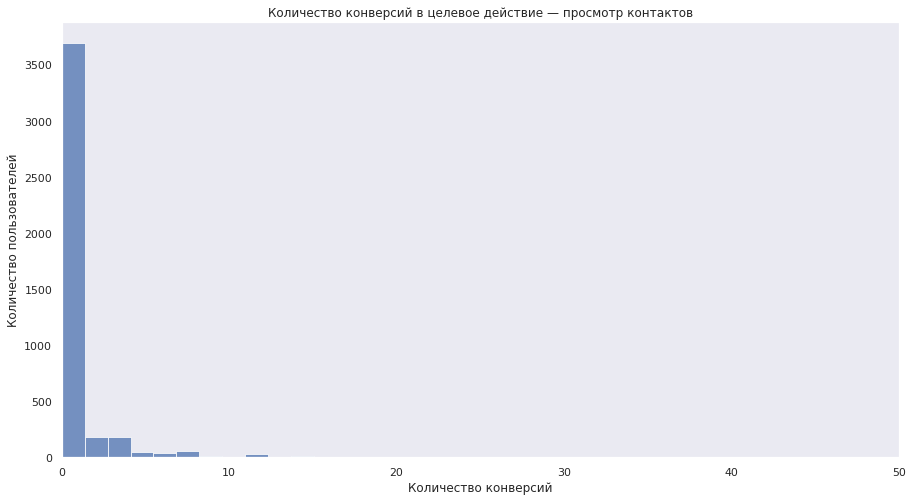

[ 2.  5. 15.]


In [68]:
plt.figure(figsize=(15, 8))
sns.histplot(features['conversions'], bins=100)
plt.title('Количество конверсий в целевое действие — просмотр контактов')
plt.xlabel('Количество конверсий')
plt.ylabel('Количество пользователей')
plt.xlim(0, 50)
plt.show()
print(np.percentile(features['conversions'], [90, 95, 99]))


На каждого пользователя приходится от одной до 5 сессий;  
Большая часть пользователей не совершает целевое действие - просмотр контактов.

Чтобы вычислить конверсию в действие contacts_show, отфильтруем основной датафрейм (с помощью метода query) по интересующему нас действию. Затем найдем количество уникальных пользователей в отфильтрованной таблице и разделим количество уникальных пользователей из отфильтрованной таблицы contacts_show_df на количество уникальных пользователей из основной таблицы и умножим на 100

In [69]:
contacts_show_df = df.query('event_name == "contacts_show"')

In [70]:
contacts_show_df['user_id'].nunique()

981

In [71]:
(contacts_show_df['user_id'].nunique() / df['user_id'].nunique()) * 100

22.851153039832283

### Вывод
По приблизительной логике действий (зашел в приложение - открыл объявление - посмотрел фото - посмотрел контакты - совершил звонок) событие contacts_show можно посчитать одним из финальных шагов пользователя в приложении. По нашим расчетам до этого события доходят ~23% пользователей.

77% - достаточно большой отток от общего количества пришедших к нам пользователей. Этому может быть несколько причин:

пользователь "теряется" в большом количестве рекомендаций - в длинной ленте объявлений пользователь может надолго "зависнуть" и отложить целенаправленный поиск и, соответственно, отклик на объявление;

управление приложением не достаточно интуитивно - возможно, путь пользователя в приложении более "тернист", чем кажется, и стоит подумать над его упрощением.

### Воронки событий

In [72]:
users = df.pivot_table(index=['user_id', 'event_date'], 
                         columns='event_name', 
                         values='event_time',
                         aggfunc='min')

In [73]:
users.sample(10)

,event_name,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search,tips_click,tips_show
user_id,event_date,,,,,,,,,
b316f8b4-89ad-4252-9127-8801f0dd98ba,2019-10-28,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-10-28 21:58:49
f4f475e8-6fd4-47b1-b1e0-f88a69a13596,2019-10-31,NaT,NaT,NaT,NaT,NaT,NaT,2019-10-31 00:19:30,NaT,NaT
f82065ff-e9fc-4873-b4c2-e219d2079f83,2019-11-02,NaT,NaT,NaT,NaT,NaT,2019-11-02 23:08:10,NaT,NaT,NaT
20436f39-6741-4e02-97a3-24899593b549,2019-10-30,NaT,NaT,2019-10-30 20:12:29,NaT,NaT,NaT,NaT,NaT,2019-10-30 13:54:18
97f41142-0d22-4bb2-9f22-8c7659d8d0de,2019-10-25,NaT,NaT,2019-10-25 22:50:18,NaT,2019-10-25 22:48:29,NaT,2019-10-25 22:48:15,NaT,2019-10-25 22:49:13
cbc08300-e2fd-4f2e-b950-e46276d80f37,2019-10-25,2019-10-25 13:13:16,NaT,NaT,NaT,2019-10-25 13:12:54,NaT,NaT,NaT,2019-10-25 13:13:24
27a94447-2ca7-473f-b415-6bfeb48d131a,2019-10-10,NaT,NaT,NaT,NaT,NaT,2019-10-10 20:12:23,NaT,NaT,NaT
19455547-8608-4ea8-abc1-a3db1ec45f2a,2019-10-24,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-10-24 23:21:45
25069cad-0d00-48cb-a627-0871a877307e,2019-10-24,NaT,NaT,NaT,NaT,NaT,2019-10-24 00:03:18,2019-10-24 00:01:32,NaT,NaT


Предположим, в каком порядке происходят события.  

search - поиск  
→  
advert_open - открытие объявления  
→  
photo_show  - просмотр фотографий  
→  
contacts_show - просмотр контакта


In [74]:
def funnels(step1, step2, step3):
  step_1 = ~users[step1].isna()
  step_2 = step_1 & (users[step2] > users[step1])
  step_3 = step_2 & (users[step3] > users[step2])
  
  title=str('"<b>Воронка событий: ' + step1 + ' - ' + step2 + ' - ' + step3 +'</b>"')

  n_1 = users[step_1].shape[0]
  n_2 = users[step_2].shape[0]
  n_3 = users[step_3].shape[0]
 

  fig = go.Figure(go.Funnel(
    y = [step1, step2, step3],
    x = [n_1, n_2, n_3],
    textposition = "auto",
    textinfo = "value+percent initial+percent previous",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )
  fig.update_layout(title=str('"<b>Воронка событий: ' + step1 + ' - ' + step2 + ' - ' + step3 +'</b>"'))
  fig.show()

In [75]:
funnels('tips_show', 'tips_click', 'contacts_show')

In [76]:
funnels('search', 'advert_open', 'contacts_show')

In [77]:
funnels('map', 'advert_open', 'contacts_show')

#### Промежуточный вывод:  
У третьей воронки показатели выше: процент открытия карточек - 30,6% (от всех, кто увидел) и процент просмотров контактов - 9,2% (от открывших карточку). В воронке для тех, кто смотрит рекомендованные объявления, самый низкие показатели - возможно стоит доработать систему рекомендаций. 

### Вывод

Мы расчитали Retention Rate для посетителей приложения, по тепловой карте видим, что за месяц показатель упал с 1 до 0.07. С каждой новой когортой поведение пользователей меняется. Нам нужно впоследствии выяснить, какие именно факторы влияют на отток пользователей.

Мы расчитали количество сессий и время,проведенное в приложении для каждого пользователя, затем получили медиану и среднее количество сессий на пользотеля: резутаты примерно сходятся - в месяц пользователь проводит в приложении примерно 2 сессии или 1 - 1,5 часа. Для специфики нашего приложения это нормальный результат - примерно за это время пользователь может найти то,что его интресует, рассмотрть варианты и принять решение о покупке. Возможно, в нашем случае следует работать не над увеличением времени, проведенном в приложении (скорее наоборот - чем быстрее пользователь будет находить то, что ему нужно, тем лучше; простотой использования мы можем увеличить вероятность того, что пользователь вернется к нам), а над количеством привлеченных пользователей.

По столбчатой диаграмме мы увидели, что самым частоповторяющимся событием является tips_show (пользователь увидел рекомендованные объявления) - мы предположили, что рекомендации для пользователя находятся на главной странице, и, открыв приложение, пользователь автоматически попадает на них.

Далее с огромным отрывом идет photos_show (просмотр фотографий в объявлении), хотя, следуя логике, на втором месте должен был бы идти поиск. Однако, видно, что search совсем не популярное событие. Мы сделали вывод, что кнопка поиска расположена в нашем приложении не совсем очевидно для пользователей (кроме search_1). Они гораздо охотнее просто просматривают фото.

Далее с примерно одинаковыми показателями идут события advert_open (открытие карточки объявления), contacts_show (пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления), map (пользователь открыл карту размещенных объявлений) и search_1. Здесь мы отметили, что гораздо чаще пользователи просматривают контакты, а не совершают звонки через приложение(у события contacts_call совсем небольшие показатели - очевидно, пользователи либо звонят "по-старинке", либо (как больше принято в последнее время) используют мессенджеры).

Мы расчитали конверсию в целевое действие(просмотр контактов): по нашим расчетам до этого события доходят ~23% пользователей. 77% - достаточно большой отток от общего количества пришедших к нам пользователей. Этому может быть несколько причин:

пользователь "теряется" в большом количестве рекомендаций - в длинной ленте объявлений пользователь может надолго "зависнуть" и отложить целенаправленный поиск и, соответственно, отклик на объявление;

управление приложением не достаточно интуитивно - возможно, путь пользователя в приложении более "тернист", чем кажется, и стоит подумать над его упрощением.

## 3. Сегментация пользователей по действиям

Маркировка признаков.   
В этой функции мы задаем действие, которое нас интересует и маркируем пользователей, которые это действие совершали (присваивается 1). При группировке по пользователю можно как сложить единицы, получив тем самым сколько раз пользователь совершал данное действие (сколько раз посмотрел контакты), так и просто увидеть, совершалось ли вообще пользователем это действие (посмотрел ли контакты хоть раз).  


In [78]:
def add_sign(name):

    df[name] = ""
    for i in range(len(df['event_name'])):
        if df['event_name'][i] == name:
            df[name][i] = 1
        else:
            df[name][i] = 0

In [79]:
add_sign('contacts_show')

In [80]:
add_sign('photos_show')

In [81]:
add_sign('tips_show')

In [82]:
add_sign('search')

In [83]:
df.sample(10)

,event_time,event_name,user_id,source,event_hour,event_week,event_month,event_year,event_date,start_dt,activ_week,start_week,cohort_lifetime,pre_action_time,active_session,session_num,contacts_show,photos_show,tips_show,search
15636,2019-10-10 20:07:54,photos_show,ef1c1ea6-1f4a-4384-b972-92c9b7c14852,other,20,2019-10-10,2019-10-01,2019-01-01,2019-10-10,2019-10-10,2019-10-07,2019-10-07,0,NaT,0 days 00:00:00,1,0,1,0,0
47629,2019-10-31 15:24:12,tips_show,5eaab80f-1bf9-4094-8b07-c4b04ae87cbc,other,15,2019-10-31,2019-10-01,2019-01-01,2019-10-31,2019-10-21,2019-10-28,2019-10-21,1,2019-10-31 15:24:12,0 days 00:00:00,8,0,0,1,0
70717,2019-11-01 12:14:15,tips_show,05a49d0d-4157-4747-8f56-1996a8258999,yandex,12,2019-10-31,2019-11-01,2019-01-01,2019-11-01,2019-11-01,2019-10-28,2019-10-28,0,2019-11-01 12:08:17,0 days 00:05:58,1,0,0,1,0
35941,2019-10-17 15:00:30,tips_show,feb7c7a1-26e0-4ea9-9cdc-3e5b401cac97,yandex,15,2019-10-17,2019-10-01,2019-01-01,2019-10-17,2019-10-17,2019-10-14,2019-10-14,0,2019-10-17 14:39:11,0 days 00:21:19,2,0,0,1,0
59699,2019-10-26 17:31:41,tips_show,e15c3bf3-a586-4c63-8379-be2393077a60,yandex,17,2019-10-24,2019-10-01,2019-01-01,2019-10-26,2019-10-26,2019-10-21,2019-10-21,0,2019-10-26 17:31:16,0 days 00:00:25,1,0,0,1,0
53305,2019-10-23 22:14:08,photos_show,2a417e6c-2036-4844-b535-2444dec53d70,other,22,2019-10-17,2019-10-01,2019-01-01,2019-10-23,2019-10-23,2019-10-21,2019-10-21,0,NaT,0 days 00:00:00,1,0,1,0,0
61972,2019-10-27 16:56:15,photos_show,b0e39107-1418-406f-a80b-99dca9237b57,yandex,16,2019-10-24,2019-10-01,2019-01-01,2019-10-27,2019-10-27,2019-10-21,2019-10-21,0,2019-10-27 16:53:05,0 days 00:03:10,1,0,1,0,0
2118,2019-10-07 14:10:22,advert_open,2c669a3c-dcd4-4c8a-8f06-3a01cc96bb8e,yandex,14,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,2019-10-07,2019-10-07,0,2019-10-07 14:07:43,0 days 00:02:39,1,0,0,0,0
42769,2019-11-03 21:09:15,contacts_show,cb32ff37-9d3e-4150-aff1-ca640731e342,yandex,21,2019-10-31,2019-11-01,2019-01-01,2019-11-03,2019-10-19,2019-10-28,2019-10-14,2,2019-11-03 21:07:14,0 days 00:02:01,3,1,0,0,0
25907,2019-10-28 16:03:37,tips_show,5bffcd16-5312-4137-8dd6-e87c9c40c7e9,other,16,2019-10-24,2019-10-01,2019-01-01,2019-10-28,2019-10-14,2019-10-28,2019-10-14,2,2019-10-28 16:00:31,0 days 00:03:06,15,0,0,1,0


Добавим дату крайнего действия пользователя

In [84]:
last_visits = df.groupby(['user_id'])['event_date'].max().reset_index()
last_visits.columns = ['user_id', 'last_dt']

In [85]:
df = df.merge(last_visits, on='user_id')

In [86]:
df['duration'] = (df['last_dt'] - df['start_dt']).dt.days + 1

In [87]:
grouped_by_user = df.groupby('user_id').agg({'duration':'mean', 
                                                          'session_num':'count', 
                                                          'event_name':'count',
                                                          'contacts_show':'sum', 
                                                          'photos_show':'max',
                                                          'tips_show':'max',
                                                          'search':'max'})
grouped_by_user = grouped_by_user.rename(columns={'session_num':'n_session', 'event_name':'n_event', 'contacts_show':'n_contacts_show'})
grouped_by_user

,duration,n_session,n_event,n_contacts_show,photos_show,tips_show,search
user_id,,,,,,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,16.00,35,35,0,0,1,0
00157779-810c-4498-9e05-a1e9e3cedf93,16.00,71,71,11,1,0,1
00463033-5717-4bf1-91b4-09183923b9df,1.00,10,10,0,1,0,0
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,14.00,32,32,0,0,1,1
00551e79-152e-4441-9cf7-565d7eb04090,5.00,8,8,3,1,0,1
...,...,...,...,...,...,...,...
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,14.00,17,17,0,0,1,0
ffc01466-fdb1-4460-ae94-e800f52eb136,1.00,7,7,1,1,0,0
ffcf50d9-293c-4254-8243-4890b030b238,1.00,2,2,0,0,1,0


In [88]:
grouped_by_user['conversion'] = grouped_by_user['n_contacts_show']/grouped_by_user['n_session']
grouped_by_user

,duration,n_session,n_event,n_contacts_show,photos_show,tips_show,search,conversion
user_id,,,,,,,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,16.00,35,35,0,0,1,0,0.00
00157779-810c-4498-9e05-a1e9e3cedf93,16.00,71,71,11,1,0,1,0.15
00463033-5717-4bf1-91b4-09183923b9df,1.00,10,10,0,1,0,0,0.00
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,14.00,32,32,0,0,1,1,0.00
00551e79-152e-4441-9cf7-565d7eb04090,5.00,8,8,3,1,0,1,0.38
...,...,...,...,...,...,...,...,...
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,14.00,17,17,0,0,1,0,0.00
ffc01466-fdb1-4460-ae94-e800f52eb136,1.00,7,7,1,1,0,0,0.14
ffcf50d9-293c-4254-8243-4890b030b238,1.00,2,2,0,0,1,0,0.00


In [89]:
grouped_by_user.describe()

,duration,n_session,n_event,n_contacts_show,photos_show,tips_show,search,conversion
count,"4,293.00","4,293.00","4,293.00","4,293.00","4,293.00","4,293.00","4,293.00","4,293.00"
mean,3.61,17.28,17.28,1.05,0.26,0.65,0.39,0.06
std,5.19,29.13,29.13,4.99,0.44,0.48,0.49,0.15
min,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,5.00,5.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,9.00,9.00,0.00,0.00,1.00,0.00,0.00
75%,4.00,17.00,17.00,0.00,1.00,1.00,1.00,0.00
max,28.00,478.00,478.00,137.00,1.00,1.00,1.00,1.00


Поделим пользователей на 4 группы в зависимости от их активности и достижения цели:
1. Часто пользуются и смотрят контакты.
2. Активно пользуется приложением, но ни разу не смотрели контакты.
3. Пользовался и смотрел контакты, но давно (так как у нас данные только за месяц, возьмем 3 недели).
4. Почти не пользуется, контакты не смотрел ни разу.

In [90]:
active_contacts_show = grouped_by_user.query('duration >= 2 and n_contacts_show >= 1')
active_no_contacts_show = grouped_by_user.query('duration >= 2 and n_contacts_show == 0')
inactive_contacts_show = grouped_by_user.query('duration < 2 and n_contacts_show >= 1')
inactive_no_contacts_show = grouped_by_user.query('duration < 2 and n_contacts_show == 0')

In [91]:
active_contacts_show.describe()

,duration,n_session,n_event,n_contacts_show,photos_show,tips_show,search,conversion
count,528.00,528.00,528.00,528.00,528.00,528.00,528.00,528.00
mean,8.26,40.67,40.67,5.85,0.42,0.49,0.48,0.20
std,6.49,60.78,60.78,12.06,0.49,0.50,0.50,0.19
min,2.00,2.00,2.00,1.00,0.00,0.00,0.00,0.00
25%,3.00,10.00,10.00,1.00,0.00,0.00,0.00,0.06
50%,6.00,20.00,20.00,2.00,0.00,0.00,0.00,0.14
75%,12.00,43.25,43.25,6.00,1.00,1.00,1.00,0.28
max,28.00,478.00,478.00,137.00,1.00,1.00,1.00,1.00


Активные, достигают цели - работаем над другими группами, чтобы увеличить численность этой.

In [92]:
active_no_contacts_show.describe()

,duration,n_session,n_event,n_contacts_show,photos_show,tips_show,search,conversion
count,"1,009.00","1,009.00","1,009.00","1,009.00","1,009.00","1,009.00","1,009.00","1,009.00"
mean,8.32,23.11,23.11,0.00,0.32,0.63,0.47,0.00
std,6.36,30.57,30.57,0.00,0.47,0.48,0.50,0.00
min,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,7.00,7.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,13.00,13.00,0.00,0.00,1.00,0.00,0.00
75%,12.00,26.00,26.00,0.00,1.00,1.00,1.00,0.00
max,28.00,407.00,407.00,0.00,1.00,1.00,1.00,0.00


Эта группа вторая по численности: активны, но не интересуются контактами. Возможно они "осматриваются" или не могут найти то, что им нужно. Нужно детальнее посмотреть, как они пользуются приложением: может им недостаточно финкционала приложения (нет возможности уточнения запроса, фильтров).

In [93]:
inactive_contacts_show.describe()

,duration,n_session,n_event,n_contacts_show,photos_show,tips_show,search,conversion
count,453.00,453.00,453.00,453.00,453.00,453.00,453.00,453.00
mean,1.00,12.64,12.64,3.18,0.25,0.56,0.27,0.31
std,0.00,13.04,13.04,5.21,0.44,0.50,0.45,0.26
min,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.01
25%,1.00,5.00,5.00,1.00,0.00,0.00,0.00,0.12
50%,1.00,8.00,8.00,2.00,0.00,1.00,0.00,0.23
75%,1.00,15.00,15.00,3.00,1.00,1.00,1.00,0.40
max,1.00,104.00,104.00,65.00,1.00,1.00,1.00,1.00


Самая маленькая группа пользователей. Они пользовались приложением лишь раз, но все равно достигли цели. Можно попробовать "позвать" их обратно, использую уведомления и тд

In [94]:
inactive_no_contacts_show.describe()

,duration,n_session,n_event,n_contacts_show,photos_show,tips_show,search,conversion
count,"2,303.00","2,303.00","2,303.00","2,303.00","2,303.00","2,303.00","2,303.00","2,303.00"
mean,1.00,10.28,10.28,0.00,0.19,0.72,0.35,0.00
std,0.00,10.01,10.01,0.00,0.39,0.45,0.48,0.00
min,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,5.00,5.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,7.00,7.00,0.00,0.00,1.00,0.00,0.00
75%,1.00,12.00,12.00,0.00,0.00,1.00,1.00,0.00
max,1.00,97.00,97.00,0.00,1.00,1.00,1.00,0.00


Самая многочисленная группа - почти не пользуются и не достигают цели. Необходимо искать способ "вернуть" их в прилжение.

### Вывод
Пользователей разделили на 4 группы - в зависимости от активности и целевому действию.
Самая многочисленная группа - почти не пользуются приложением. "Поставил и забыл". Необходимо напомнить им о приложении - Пушсообщения, рассылка?

Вторая по численности группа: активны, но не интересуются контактами. Возможно им либо чего то не хватает в функционале либо просто смотрят для ориентации по ценам.

Третья по численности групп - наш клиент. 

Четвертая группа - зашла, нашла что хотела и ушла. Нужно напомнить, что в приложении еще много вещей которые их могут заинтересовать.


У нас также не пересекаются пользователи, которые пользуются рекомендованными объявлениями, и те, кто ищет через строку поиска. Мы можем разделить пользователей по тому, что они выбрали поиск или рекомендации и придумать способы поднятия конверсии в каждой группе:

In [95]:
tips_show_yes = grouped_by_user.query('tips_show == 1')
search_yes = grouped_by_user.query('search == 1')

Text(0.5, 0, 'Конверсии в просмотры')

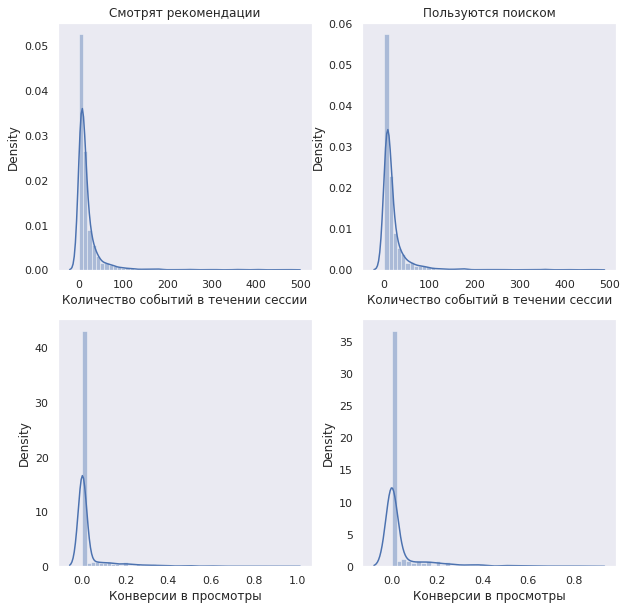

In [96]:
fig = plt.figure(figsize=(10,10))
area = fig.add_subplot(2, 2, 1)
ax = sns.distplot(tips_show_yes['n_event'])
ax.set_title("Смотрят рекомендации")
ax.set_xlabel("Количество событий в течении сессии")

area = fig.add_subplot(2, 2, 2)
ax = sns.distplot(search_yes['n_event'])
ax.set_title("Пользуются поиском")
ax.set_xlabel("Количество событий в течении сессии")

area = fig.add_subplot(2, 2, 3)
ax = sns.distplot(tips_show_yes['conversion'])
ax.set_xlabel("Конверсии в просмотры")


area = fig.add_subplot(2, 2, 4)
ax=sns.distplot(search_yes['conversion'])
ax.set_xlabel("Конверсии в просмотры")


Юзеры чаще смотря рекомендации, но конверсий у них меньше (Залипают и в итоге просто перебирают). Стоит посмотреть, как работает система подбора рекомендуемых объявлений. Найти какие изменения можно реализовать и протестировать. Поиск также можно отдельно дорабатывать, работая над релевантностью выдачи, добавляя фильтры и проч.

Добавим информацию об источниках и разобьем пользователей на группы

In [97]:
grouped_by_user = grouped_by_user.merge(sources, on='user_id')
grouped_by_user

,user_id,duration,n_session,n_event,n_contacts_show,photos_show,tips_show,search,conversion,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,16.00,35,35,0,0,1,0,0.00,other
1,00157779-810c-4498-9e05-a1e9e3cedf93,16.00,71,71,11,1,0,1,0.15,yandex
2,00463033-5717-4bf1-91b4-09183923b9df,1.00,10,10,0,1,0,0,0.00,yandex
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,14.00,32,32,0,0,1,1,0.00,google
4,00551e79-152e-4441-9cf7-565d7eb04090,5.00,8,8,3,1,0,1,0.38,yandex
...,...,...,...,...,...,...,...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,14.00,17,17,0,0,1,0,0.00,yandex
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,1.00,7,7,1,1,0,0,0.14,yandex
4290,ffcf50d9-293c-4254-8243-4890b030b238,1.00,2,2,0,0,1,0,0.00,google
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,8.00,13,13,1,1,0,1,0.08,yandex


In [98]:
grouped_by_user.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4293 entries, 0 to 4292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          4293 non-null   object 
 1   duration         4293 non-null   float64
 2   n_session        4293 non-null   int64  
 3   n_event          4293 non-null   int64  
 4   n_contacts_show  4293 non-null   int64  
 5   photos_show      4293 non-null   int64  
 6   tips_show        4293 non-null   int64  
 7   search           4293 non-null   int64  
 8   conversion       4293 non-null   float64
 9   source           4293 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 368.9+ KB


Разделим пользователей на группы по источнику и визуально их сравним:

In [99]:
source_yandex = grouped_by_user.query('source == "yandex"')
source_google = grouped_by_user.query('source == "google"')

In [100]:
source_yandex.describe()

,duration,n_session,n_event,n_contacts_show,photos_show,tips_show,search,conversion
count,"1,934.00","1,934.00","1,934.00","1,934.00","1,934.00","1,934.00","1,934.00","1,934.00"
mean,3.58,17.73,17.73,1.05,0.23,0.68,0.32,0.06
std,5.09,30.83,30.83,4.36,0.42,0.47,0.47,0.16
min,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,5.00,5.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,9.00,9.00,0.00,0.00,1.00,0.00,0.00
75%,4.00,18.00,18.00,0.00,0.00,1.00,1.00,0.00
max,28.00,478.00,478.00,86.00,1.00,1.00,1.00,1.00


In [101]:
source_google.describe()

,duration,n_session,n_event,n_contacts_show,photos_show,tips_show,search,conversion
count,"1,129.00","1,129.00","1,129.00","1,129.00","1,129.00","1,129.00","1,129.00","1,129.00"
mean,3.48,18.11,18.11,1.28,0.32,0.58,0.43,0.06
std,5.11,32.09,32.09,6.58,0.47,0.49,0.50,0.16
min,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,5.00,5.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,9.00,9.00,0.00,0.00,1.00,0.00,0.00
75%,3.00,18.00,18.00,0.00,1.00,1.00,1.00,0.00
max,28.00,397.00,397.00,137.00,1.00,1.00,1.00,1.00


Text(0.5, 0, 'Конверсии в просмотры')

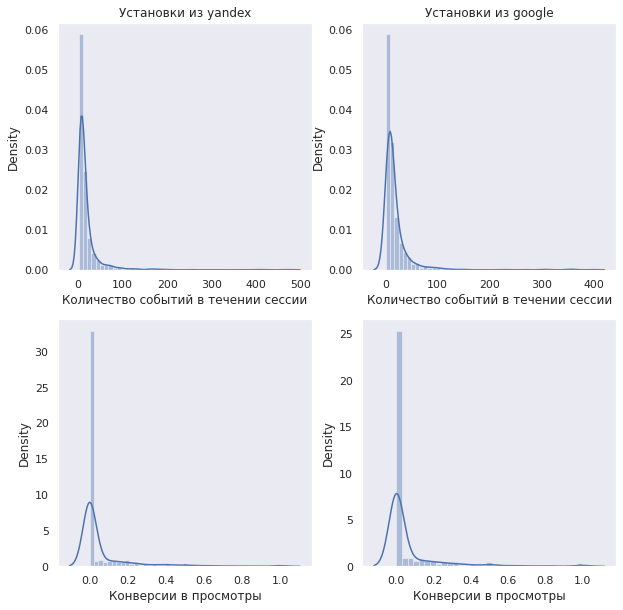

In [102]:
fig = plt.figure(figsize=(10,10))
area = fig.add_subplot(2, 2, 1)
ax = sns.distplot(source_yandex['n_event'])
ax.set_title("Установки из yandex")
ax.set_xlabel("Количество событий в течении сессии")

area = fig.add_subplot(2, 2, 2)
ax = sns.distplot(source_google['n_event'])
ax.set_title("Установки из google")
ax.set_xlabel("Количество событий в течении сессии")

area = fig.add_subplot(2, 2, 3)
ax = sns.distplot(source_yandex['conversion'])
ax.set_xlabel("Конверсии в просмотры")


area = fig.add_subplot(2, 2, 4)
ax=sns.distplot(source_google['conversion'])
ax.set_xlabel("Конверсии в просмотры")

При рассмотрении по источникам установки видно, пользователи установившие приложение из Googla просматривают контакт более активно

##  4. Проверка статистических гипотез

### Группы *yandex_df*  и *google_df*  демонстрируют разную конверсию в просмотры контактов

In [103]:
google_df = df.query('source == "google"')
yandex_df = df.query('source == "yandex"')

Для проверки гипотезы мы проведем **z-test**. С помощью метода ***pivot_table*** создадим таблицу **users_events_per_group**, в которой по действиям и источникам посчитаем уникальных пользователей:

**H0** - "Конверсии групп Google и Яндекс в просмотр контактов равны".

**H1** - "Конверсии групп Google и Яндекс в просмотр контактов различаются".

Trial

In [104]:
trials_yandex = yandex_df.user_id.nunique()
trials_google = google_df.user_id.nunique()

Succes

In [105]:
successes_yandex = yandex_df.query('event_name=="contacts_show" & source == "yandex"').user_id.nunique()
successes_google = google_df.query('event_name=="contacts_show"').user_id.nunique()

In [106]:
conversion_yandex = successes_yandex / trials_yandex

In [107]:
conversion_google = successes_google / trials_google

In [108]:
alpha = .05 # критический уровень статистической значимости


        
successes = np.array([successes_google, successes_yandex])
trials = np.array([trials_google, trials_yandex]) 
        
print("successes: ")
print(successes)

print("trials:")
print(trials)

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2
print(f'p_values = {p_value}')
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, статистически значимых отличий нет") 
print(f'Средняя конверсия в просмотры контактов у пользователей, которые совершили установку приложения, прийдя с источника yandex: {conversion_yandex:.2%}')
print(f'Средняя конверсия в просмотры контактов у пользователей, которые совершили установку приложения, прийдя с источника google: {conversion_google:.2%}')        


successes: 
[275 478]
trials:
[1129 1934]
p_values = 0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, статистически значимых отличий нет
Средняя конверсия в просмотры контактов у пользователей, которые совершили установку приложения, прийдя с источника yandex: 24.72%
Средняя конверсия в просмотры контактов у пользователей, которые совершили установку приложения, прийдя с источника google: 24.36%


**Вывод**: с помощью **z-test-a** мы  приняли нулевую гипотезу и сделали вывод, что *конверсии групп Google и Яндекс в просмотр контактов не различаются*.

### Среднее время,  проведенное в приложении, у групп пользователей ,совершивших целевое действие(просмотр контактов) и не совершивших его, различается

Подготовим данные для проверки гипотезы.

Отфильтруем таблицы по поьзователям, которые совершали целевое действие (**full_contacts_show**) и не совершали (**not_contacts_show**). Преобразуем тип данных столбца *active_session* в *integer* - этот тип данных нужен нам для применения **t-test-a**:

In [109]:
df['active_session'] = df['active_session'].astype('timedelta64[m]')

In [110]:
contacts_show_df = df.query('event_name == "contacts_show"') 
users_contacts_show = contacts_show_df['user_id'].unique()
full_contacts_show = df[df['user_id'].isin(users_contacts_show)]

full_contacts_show['active_session'] = full_contacts_show['active_session'].astype('int')
    
full_contacts_show

,event_time,event_name,user_id,source,event_hour,event_week,event_month,event_year,event_date,start_dt,...,cohort_lifetime,pre_action_time,active_session,session_num,contacts_show,photos_show,tips_show,search,last_dt,duration
121,2019-10-07 00:02:07,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,...,0,NaT,0,1,0,0,1,0,2019-10-29,23
122,2019-10-07 00:05:16,contacts_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,...,0,2019-10-07 00:02:07,3,1,1,0,0,0,2019-10-29,23
123,2019-10-07 00:06:01,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,...,0,2019-10-07 00:05:16,0,1,0,0,1,0,2019-10-29,23
124,2019-10-07 00:06:56,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,...,0,2019-10-07 00:06:01,0,1,0,0,1,0,2019-10-29,23
125,2019-10-07 00:09:25,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,...,0,2019-10-07 00:06:56,2,1,0,0,1,0,2019-10-29,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74187,2019-11-03 23:46:31,contacts_show,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,23,2019-10-31,2019-11-01,2019-01-01,2019-11-03,2019-11-03,...,0,NaT,0,1,1,0,0,0,2019-11-03,1
74188,2019-11-03 23:48:47,tips_click,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,23,2019-10-31,2019-11-01,2019-01-01,2019-11-03,2019-11-03,...,0,2019-11-03 23:46:31,2,1,0,0,0,0,2019-11-03,1
74189,2019-11-03 23:50:06,tips_click,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,23,2019-10-31,2019-11-01,2019-01-01,2019-11-03,2019-11-03,...,0,2019-11-03 23:48:47,1,1,0,0,0,0,2019-11-03,1
74190,2019-11-03 23:51:09,tips_click,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,23,2019-10-31,2019-11-01,2019-01-01,2019-11-03,2019-11-03,...,0,2019-11-03 23:50:06,1,1,0,0,0,0,2019-11-03,1


In [111]:
full_contacts_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27197 entries, 121 to 74191
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   event_time       27197 non-null  datetime64[ns]
 1   event_name       27197 non-null  object        
 2   user_id          27197 non-null  object        
 3   source           27197 non-null  object        
 4   event_hour       27197 non-null  int64         
 5   event_week       27197 non-null  datetime64[ns]
 6   event_month      27197 non-null  datetime64[ns]
 7   event_year       27197 non-null  datetime64[ns]
 8   event_date       27197 non-null  datetime64[ns]
 9   start_dt         27197 non-null  datetime64[ns]
 10  activ_week       27197 non-null  datetime64[ns]
 11  start_week       27197 non-null  datetime64[ns]
 12  cohort_lifetime  27197 non-null  int64         
 13  pre_action_time  26216 non-null  datetime64[ns]
 14  active_session   27197 non-null  int

In [112]:
not_contacts_show = df[~df['user_id'].isin(users_contacts_show)]
not_contacts_show['active_session'] = not_contacts_show['active_session'].astype('int')    
not_contacts_show

,event_time,event_name,user_id,source,event_hour,event_week,event_month,event_year,event_date,start_dt,...,cohort_lifetime,pre_action_time,active_session,session_num,contacts_show,photos_show,tips_show,search,last_dt,duration
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,...,0,NaT,0,1,0,0,0,0,2019-10-07,1
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,...,0,2019-10-07 00:00:00,0,1,0,0,1,0,2019-10-07,1
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,...,0,2019-10-07 00:00:01,0,1,0,0,1,0,2019-10-07,1
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,...,0,2019-10-07 00:00:07,1,1,0,0,0,0,2019-10-07,1
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07,2019-10-07,...,0,2019-10-07 00:01:28,0,1,0,0,1,0,2019-10-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74192,2019-11-03 23:46:47,map,d157bffc-264d-4464-8220-1cc0c42f43a9,google,23,2019-10-31,2019-11-01,2019-01-01,2019-11-03,2019-11-03,...,0,NaT,0,1,0,0,0,0,2019-11-03,1
74193,2019-11-03 23:46:59,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,23,2019-10-31,2019-11-01,2019-01-01,2019-11-03,2019-11-03,...,0,2019-11-03 23:46:47,0,1,0,0,0,0,2019-11-03,1
74194,2019-11-03 23:47:01,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google,23,2019-10-31,2019-11-01,2019-01-01,2019-11-03,2019-11-03,...,0,2019-11-03 23:46:59,0,1,0,0,1,0,2019-11-03,1
74195,2019-11-03 23:47:47,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,23,2019-10-31,2019-11-01,2019-01-01,2019-11-03,2019-11-03,...,0,2019-11-03 23:47:01,0,1,0,0,0,0,2019-11-03,1


Сформулируем гипотезы:

**Н0**: "Среднее время, проведенное в приложении, у групп пользователей ,совершивших целевое действие(просмотр контактов) и не совершивших его, равно".

**Н1**: "Среднее время, проведенное в приложении, у групп пользователей ,совершивших целевое действие(просмотр контактов) и не совершивших его, различается".

Проведем **t-test**:

In [113]:
alpha = .05

results = st.ttest_ind(
    full_contacts_show['active_session'], 
    not_contacts_show['active_session'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, различия статистически значимы")
else:
    print("Не получилось отвергнуть нулевую гипотезу, статистически значимых различий нет") 
print(f"Среднее время, проведенное в приложении, у групп пользователей совершивших целевое действие: {full_contacts_show['active_session'].mean():2f}")
print(f"Среднее время, проведенное в приложении, у групп пользователей не совершивших целевое действие: {not_contacts_show['active_session'].mean()}")

p-значение: 4.224485656634515e-24
Отвергаем нулевую гипотезу, различия статистически значимы
Среднее время, проведенное в приложении, у групп пользователей совершивших целевое действие: 1.602566
Среднее время, проведенное в приложении, у групп пользователей не совершивших целевое действие: 1.3522340425531916


**Вывод**: по результатам проверки мы отвергаем нулевую гипотезу и делаем предположение, что среднее время, проведенное в приложении, у групп пользователей ,совершивших целевое действие(просмотр контактов) и не совершивших его, различается.

### Вывод

Гипотезу о различии конверсий у групп пользователей, пришедших с *Google* и *Яндекс*, мы проверяли с помощью **z-test-a**. с помощью **z-test-a** мы  приняли нулевую гипотезу и сделали вывод, что *конверсии групп Google и Яндекс в просмотр контактов не различаются*

Также мы сформулировали гипотезу о различии среднего времени, проведенном в приложении, у групп пользователей ,совершивших целевое действие(просмотр контактов) и не совершивших его. Эту гипотезу мы проверяли с помощью **t-test-a**. По результатам проверки мы отвергли нулевую гипотезу и сделали предположение, что среднее время, проведенное в приложении, у групп пользователей ,совершивших целевое действие(просмотр контактов) и не совершивших его, различается.

## Общие выводы и рекомендации

### Выводы

Мы выгрузили два датафрейма. Первый - **mobile_df** - содержит данные о идентификаторах пользователей, времени совершения событий и типе событий. Второй - **source_df** - также содержит данные об идентификаторах пользователей и об источниках, с которых пользователи устанавливают приложение.

Мы проверили таблицы на пропуски и дубликаты - данные оказались чистыми. Мы объединили две таблицы в одну - **df** - и также проверили ее на дубликаты (не обнаружили). Удостоверились, что обладаем данными за период с **7 октября** по **3 ноября 2019 года**.

Мы проверили данные на аномальные значения (с помощью сводной таблицы и метода ***describe***) и выяснили, что у нас есть данные о действиях *4293 пользователей* нашего приложения, и в среднем на пользователя приходится *17 событий*. Для наглядности мы построили диаграмму размаха и по ней увидели, что выбросов много и они доходят почти до 500 (если точнее, то до 478). Медиана даже меньше среднего - *~10 событий* приходится в основном на пользователя в месяц. Однако, мы решили,что выбросов очень много и их удаление приведет к большой потере данных. 

Мы расчитали ***Retention Rate*** для всех посетителей приложения, по тепловой карте видим, что за месяц показатель упал с *1 до 0.07*. С каждой новой когортой поведение пользователей меняется.

Мы расчитали количество сессий и время,проведенное в приложении для каждого пользователя, затем получили медиану и среднее количество сессий на пользотеля: резутаты примерно сходятся - в месяц пользователь проводит в приложении примерно *2 сессии* или 40 минут*. Для специфики нашего приложения это нормальный результат - примерно за это время пользователь может найти то,что его интресует, рассмотрть варианты и принять решение о покупке.

По столбчатой диаграмме мы увидели, что самым частоповторяющимся событием является *tips_show* (пользователь увидел рекомендованные объявления) - мы предположили, что рекомендации для пользователя находятся на главной странице, и, открыв приложение, пользователь автоматически попадает на них. 

Далее с огромным отрывом идет *photos_show* (просмотр фотографий в объявлении), хотя, следуя логике, на втором месте должен был бы идти поиск. Однако, видно, что *search* совсем не популярное событие. Мы сделали вывод, что кнопка поиска расположена в нашем приложении не совсем очевидно для пользователей (кроме *search_1*). Они гораздо охотнее просто просматривают фото. 

Далее с примерно одинаковыми показателями идут события *advert_open* (открытие карточки объявления), *contacts_show* (пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления), *map* (пользователь открыл карту размещенных объявлений) и *search_1*. Здесь мы отметили, что гораздо чаще пользователи просматривают контакты, а не совершают звонки через приложение(у события *contacts_call* совсем небольшие показатели - очевидно, пользователи либо звонят "по-старинке", либо (как больше принято в последнее время) используют мессенджеры).

Мы расчитали конверсию в целевое действие(просмотр контактов): по нашим расчетам до этого события доходят *~23%* пользователей. *77%* -  достаточно большой отток от общего количества пришедших к нам пользователей. Этому может быть несколько причин:

*  *пользователь "теряется" в большом количестве рекомендаций* - в длинной ленте объявлений пользователь может надолго "зависнуть" и отложить целенаправленный поиск и, соответственно, отклик на объявление;

*  *управление приложением не достаточно интуитивно* - возможно, путь пользователя в приложении более "тернист", чем кажется, и стоит подумать над его упрощением.

По расчитанным выше метрикам рассмотрели их поведение.

Пользователей разделили на 4 группы - в зависимости от активности и целевому действию. Самая многочисленная группа - почти не пользуются приложением. "Поставил и забыл". Необходимо напомнить им о приложении - Пушсообщения, рассылка?

Вторая по численности группа: активны, но не интересуются контактами. Возможно им либо чего то не хватает в функционале либо просто смотрят для ориентации по ценам.

Третья по численности групп - наш клиент.

Четвертая группа - зашла, нашла что хотела и ушла. Нужно напомнить, что в приложении еще много вещей которые их могут заинтересовать.

Юзеры чаще смотря рекомендации, но конверсий у них меньше (Залипают и в итоге просто перебирают). Стоит посмотреть, как работает система подбора рекомендуемых объявлений. Найти какие изменения можно реализовать и протестировать. Поиск также можно отдельно дорабатывать, работая над релевантностью выдачи, добавляя фильтры и проч.

Анализируя результаты расчетов групп, можно отметить следующее:

*  *нужно привлекать больше пользователей с таких источников, как **Яндекс** и **Google** - эти группы показывают неплохую(по сравнению с другими группами) конверсию в просмотр контактов;*

*  *группа, используящая поиск по приложению, довольно стабильна, однако следует поработать над   упрощением этой функции - сама по себе группа не очень многочислена*;


Также мы проверили гипотезы следующие гипотезы:

**Н0: "Конверсии групп Google и Яндекс в просмотр контактов равны".**

**Н0: "Среднее время, проведенное в приложении, у групп пользователей ,совершивших целевое действие(просмотр контактов) и не совершивших его, равно".**

Гипотезу о различии конверсий у групп пользователей, пришедших с *Google* и *Яндекс*, мы проверяли с помощью **z-test-a**. Мы приняли нулевую гипотезу и сделали вывод, что *конверсии групп Google и Яндекс в просмотр контактов не различаются*.

Также мы сформулировали гипотезу о различии среднего времени, проведенном в приложении, у групп пользователей ,совершивших целевое действие(просмотр контактов) и не совершивших его. Эту гипотезу мы проверяли с помощью **t-test-a**. По результатам проверки мы отвергли нулевую гипотезу и сделали предположение, что среднее время, проведенное в приложении, у групп пользователей ,совершивших целевое действие(просмотр контактов) и не совершивших его, различается.

### Рекомендации

1. *Следует обратить внимание на кнопку поиска, возможно, сделать ее рядом с рекомендациями, более заметной для пользователя* - оказывась на главной странице приложения, автоматически попадает в рекомендации. Однако, среди тех, кто использует поиск, довольная большая (по сравнению с другими группами) конверсия в просмотр контактов - то есть, используя поиск, людям важно достичь цели - найти нужную им вещь и связаться с продавцом. У пользователей, просто листающих рекомендации, может не быть цели что-то купить.

2. *Поработать над привлечением большего количества пользователей* - по специфике нашего приложения можно сделать предположение, что чем быстрее пользователь нашел то,что ему нужно - тем лучше, значит мы смогли сделать его максимально удобным для поиска. Поэтому следует работать не над увеличением времени, проведенного пользователем в приложении, а над увеличением количества пользователей.

3. *Поработать над привлечением большего количества пользователей с источника "Google"* - эта группа пользователей показала лучший показатель ***Retention Rate*** (коэффициент удержания), чем группа, установивших приложение через *Яндекс*. 

4. *Подумать над способами удержания старых пользователей* - например, разработать премиум - подписку, которое будет повышать в рейтинге размещенные пользователями объявления (пробный бесплатный период - 7 дней). 